# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Yanuar AlHisyami]
- **Email:** [melonpea12@gmail.com]
- **ID Dicoding:** [isamk04j]

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda?
- Bagaimana tren peminjaman harian antara peminjam biasa dan peminjam yang terdaftar?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
df_day = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ProjectSubmissionAnalisisData/day.csv')
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Pembacaan data yang bernama day.csv dan ditampilkan 5 data awal.

### Assessing Data

#### Missing Value dan Duplicated Data

In [ ]:
print("Missing value pada data: ")
print(df_day.isnull().sum())
print("\n\n")
print("Jumlah data yang memiliki duplikat: ", df_day.duplicated().sum())

Missing value pada data: 
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64



Jumlah data yang memiliki duplikat:  0


**Insight:**
- Tidak ada nilai yang hilang pada data set dan juga tidak ada data yang duplikat

### Cleaning Data

Menghapus kolom yang tidak diperlukan

In [ ]:
df_day_cleaned = df_day.drop(columns=['instant', 'yr', 'mnth', 'holiday', 'workingday'])
df_day_cleaned.head()

,dteday,season,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,6,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,2,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,3,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Mengganti nama kolom yang tidak relevan

In [ ]:
df_day_cleaned = df_day_cleaned.rename(columns={'dteday': 'date', 'weathersit': 'weather_condition', 'hum': 'humidity', 'cnt': 'count'})
df_day_cleaned.head()

,date,season,weekday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,1,6,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,2,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,3,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Mengubah format date yang sebelumnya object menjadi datetime

In [109]:
df_day_cleaned['date'] = pd.to_datetime(df_day_cleaned['date'])
df_day_cleaned.info()
df_day_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               731 non-null    datetime64[ns]
 1   season             731 non-null    int64         
 2   weekday            731 non-null    int64         
 3   weather_condition  731 non-null    int64         
 4   temp               731 non-null    float64       
 5   atemp              731 non-null    float64       
 6   humidity           731 non-null    float64       
 7   windspeed          731 non-null    float64       
 8   casual             731 non-null    int64         
 9   registered         731 non-null    int64         
 10  count              731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(6)
memory usage: 62.9 KB


,date,season,weekday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,1,6,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,2,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,3,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Beberapa bagian kolom dihapus karena kurang relevan dengan pertanyaan analisis yang diajukan.
- Kolom yang dihapus yaitu: instant, yr, mnth, holiday dan workingday
- Beberapa kolom juga diubah namanya agar terlihat familiar
- Kolom date yang tipe datanya object diubah menjadi tipe data datetime.

## Exploratory Data Analysis (EDA)

In [ ]:
df_day_cleaned.describe(include="all")

,date,season,weekday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count
count,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2012-01-01 00:00:00,2.496580,2.997264,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,2.000000,1.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,3.000000,3.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,3.000000,5.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,4.000000,6.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,NaN,1.110807,2.004787,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [ ]:
df_day_cleaned.groupby(by="season").agg({
    "registered": 'sum',
    "casual": 'sum'
})

,registered,casual
season,,
1,410726,60622
2,715067,203522
3,835038,226091
4,711831,129782


**Insight:**
- Berdasarkan ringkasan dataset tersebut, terlihat bahwa jumlah rata-rata peminjam sepeda sekitar 4504 per harinya. Terdapat juga ringkasan mengenai lainnya seperti min, max, kuartil dan standard deviasi.
- Berdasarkan hasil diatas, dapat dilihat juga jumlah antara peminjam yang terdaftar dan yang tidak pada tiap musimnya. Jumlah peminjam terdaftar lebih banyak dari peminjam biasa.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda?

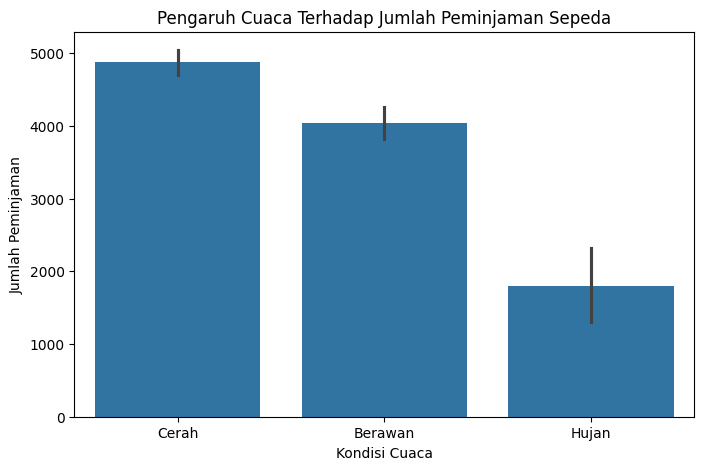

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x='weather_condition', y='count', data=df_day_cleaned)
plt.title('Pengaruh Cuaca Terhadap Jumlah Peminjaman Sepeda')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Peminjaman')
plt.xticks([0, 1, 2], ['Cerah', 'Berawan', 'Hujan'])
plt.show()


### Pertanyaan 2:

Bagaimana tren peminjaman harian antara peminjam biasa dan peminjam yang terdaftar?

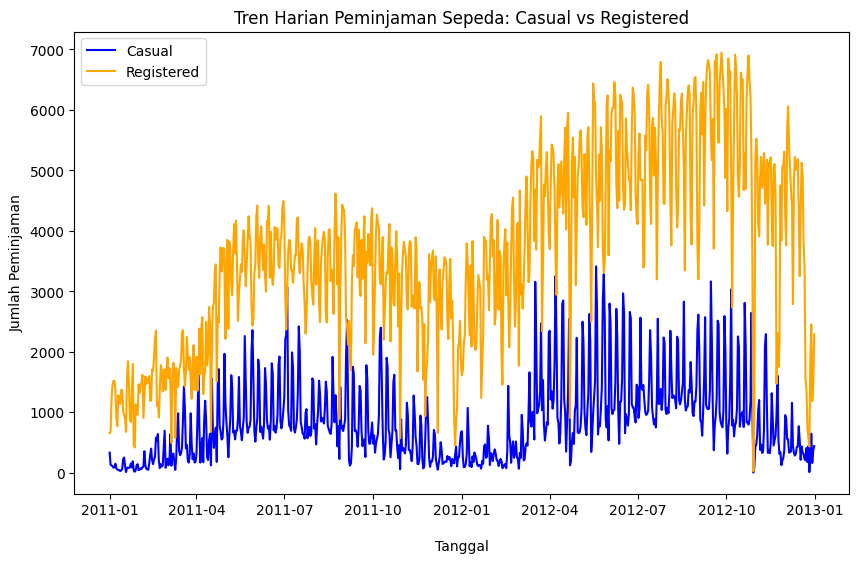

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_day_cleaned, x='date', y='casual', label='Casual', color='blue')
sns.lineplot(data=df_day_cleaned, x='date', y='registered', label='Registered', color='orange')
plt.title('Tren Harian Peminjaman Sepeda: Casual vs Registered')
plt.xlabel('\nTanggal')
plt.ylabel('Jumlah Peminjaman')
plt.legend()
plt.show()

**Insight:**
- Line plot ini akan menampilkan tren peminjaman sepeda harian oleh pengguna casual dan registered. Ini membantu untuk melihat pola penggunaan sepanjang tahun, misalnya apakah ada hari tertentu (libur atau akhir pekan) di mana pengguna casual lebih sering meminjam sepeda, dan apakah pengguna registered memiliki tren peminjaman yang lebih stabil.

## Conclusion

- Berdasarkan visualisasi yang ditampilkan untuk pertanyaan pertama, terlihat bahwa kondisi cuaca memiliki pengaruh yang cukup signifikan terhadap jumlah peminjaman sepeda. Pada kondisi cuaca cerah, jumlah peminjaman sepeda cenderung lebih tinggi dibandingkan dengan kondisi cuaca mendung atau hujan. Hal ini masuk akal, karena peminjaman sepeda lebih nyaman dilakukan saat cuaca cerah. Sementara pada cuaca mendung atau hujan, jumlah peminjam cenderung menurun.
- Dari visualisasi pada pertanyaan kedua, terlihat bahwa peminjam terdaftar secara konsisten meminjam sepeda lebih sering dibandingkan peminjam biasa. Peminjaman oleh peminjam terdaftar menunjukkan pola yang stabil setiap hari, sementara peminjam biasa menunjukkan pola peminjaman yang lebih bervariasi, dengan puncak peminjaman biasanya terjadi pada akhir pekan atau hari libur. Hal ini menunjukkan bahwa peminjam terdaftar cenderung menggunakan sepeda sebagai sarana transportasi harian, sedangkan peminjam biasa lebih banyak menggunakan sepeda untuk rekreasi atau aktivitas yang tidak rutin.